<a href="https://colab.research.google.com/github/justprophet/Movie-Recommendation-System/blob/master/code/Content_based_prediction_using_CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [0]:
import numpy as np

In [0]:
import pandas as pd
import io

##Mounting Drive

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df=pd.read_csv('gdrive/My Drive/Assignment 2/Data/merged_without_ratings_data.csv')

In [0]:
df['CastCrew'] = df['cast'] + df['crew']
df['CastCrew'].head()

0    ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...
1    ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...
2    ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...
3    ['Whitney Houston', 'Angela Bassett', 'Loretta...
4    ['Steve Martin', 'Diane Keaton', 'Martin Short...
Name: CastCrew, dtype: object

In [0]:
df_small = df[0:25000]

In [0]:
df_small.shape

(25000, 19)

In [0]:
df_small.columns

##Content_Based

In [0]:
df_small['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Define a CountVectorizer Object. Remove all english stop words such as 'the', 'a'
cv = CountVectorizer()
#Construct the required CountVectorizer matrix by fitting and transforming the data
cv_matrix = cv.fit_transform(df_small['overview'].dropna())
cv_matrix.shape

(25000, 53563)

We see that over 53259 different words were used to describe the 25000 movies in our dataset.



In [0]:
#compute similarity score using the cosine similarity matrix
from sklearn.metrics.pairwise import linear_kernel

###creating cosine similarity matrix for overview

In [0]:
cosine_sim = linear_kernel(cv_matrix, cv_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and dataframe indices which means we need a mechanism to identify the index of a movie in our dataframe, given its title.

In [0]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df_small.index, index=df_small['title']).drop_duplicates()

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_small['title'].iloc[movie_indices]

In [0]:
df_small.head(5)

In [0]:
get_recommendations('Jumanji')

In [0]:
df_small['cast'].head(5)

In [0]:
df_small['crew'].head(5)

In [0]:
df_small['keywords'].head(5)

#Cast_Crew_Based_Recommendation using CountVectorizer

In [0]:
#Define a Count Vectorizer Object. Remove all english stop words such as 'the', 'a'
cv2 = CountVectorizer(stop_words='english')
#Construct the required Count Vectorizer matrix by fitting and transforming the data
cv2_matrix2 = cv2.fit_transform(df_small['CastCrew'].dropna())
cv2_matrix2.shape

(25000, 113799)

###creating cosine similarity matrix for castcrew

In [0]:
cv2_matrix2

<25000x113799 sparse matrix of type '<class 'numpy.int64'>'
	with 1228716 stored elements in Compressed Sparse Row format>

In [0]:
cosine_sim_castcrew = linear_kernel(cv2_matrix2, cv2_matrix2)

In [0]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df_small.index, index=df_small['title']).drop_duplicates()

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations_CastCrew(title, cosine_sim=cosine_sim_castcrew):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    #return df_small['title'].iloc[movie_indices]
  
    topMovies = df_small['title'].iloc[movie_indices]
    movie_ratings = [i[1] for i in sim_scores]
    topMovies['Score'] = movie_ratings
    return  topMovies

In [0]:
get_recommendations_CastCrew('Toy Story')

4038                                            15 Minutes
4757                                        Monsters, Inc.
2994                                           Toy Story 2
18260                                The Dark Knight Rises
1508                                               Contact
6029                                             Daredevil
17832                                         The Avengers
22100                              The Wolf of Wall Street
10140                                        Batman Begins
12507                                      The Dark Knight
Score    [321.0, 298.0, 289.0, 224.0, 197.0, 175.0, 168...
Name: title, dtype: object

In [0]:
topMovies=get_recommendations_CastCrew('Toy Story')

In [0]:
print("--------------Scores---------------------------")
print(topMovies['Score'])

--------------Scores---------------------------
[321.0, 298.0, 289.0, 224.0, 197.0, 175.0, 168.0, 164.0, 160.0, 160.0]


##Plotting Similarity Scores of top 10 movies

In [0]:
titles = np.array(topMovies)[0:10]
score = np.array(topMovies['Score'])

In [0]:
from textwrap import wrap
titles = [ '\n'.join(wrap(l, 10)) for l in titles ]

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 40,20

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


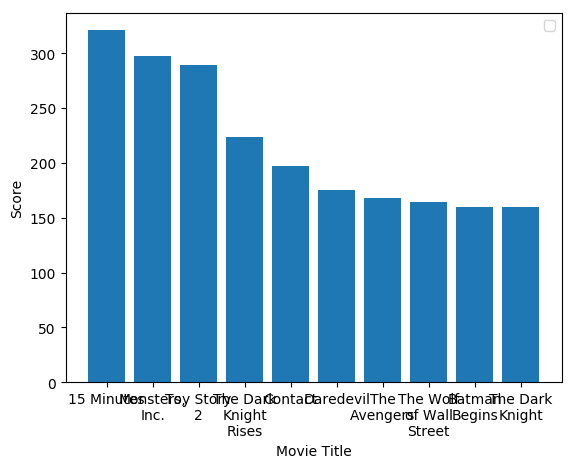

In [0]:
ind = np.arange(1,len(score)+1)
plt.title("")
plt.ylabel("Score")
plt.xlabel("Movie Title")
plt.bar(ind, score,tick_label=titles, align = 'center')
plt.legend()
plt.show()